In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
folder_names = ['result_1_directed', 'result_2_directed', 'result_3_directed']

df_times_pre = []
for i in range(3):
    df_times_pre.append({
        'V/2': pd.read_csv(f'experiment/{folder_names[i]}/0.csv'),
        'V': pd.read_csv(f'experiment/{folder_names[i]}/1.csv'),
        '2V': pd.read_csv(f'experiment/{folder_names[i]}/2.csv'),
        '4V': pd.read_csv(f'experiment/{folder_names[i]}/3.csv'),
        '8V': pd.read_csv(f'experiment/{folder_names[i]}/4.csv'),
        '2VlogV': pd.read_csv(f'experiment/{folder_names[i]}/5.csv'),
        '4VlogV': pd.read_csv(f'experiment/{folder_names[i]}/6.csv'),
        '2V^2/logV': pd.read_csv(f'experiment/{folder_names[i]}/7.csv'),
        'V(V-1)': pd.read_csv(f'experiment/{folder_names[i]}/8.csv'),
    })

df_times = {}
for key in df_times_pre[0].keys():
    df_times[key] = (df_times_pre[0][key] + df_times_pre[1][key] + df_times_pre[2][key]) // 3

for key in df_times.keys():
    df_times[key] = df_times[key].sort_values(by='V')

In [36]:
algo_list = df_times['V'].columns.copy()
other_algo_list = algo_list.drop(['Floyd Warshall', 'V'])
for key in df_times.keys():
    for algo in other_algo_list:
        df_times[key][algo + ' (%)'] = (df_times[key][algo] / df_times[key]['Floyd Warshall']) * 100

In [37]:
def plot_for_range(category, with_line=True, start = -1):
    range_df = df_times[category][df_times[category]['V'] > start]
    range_df.plot(x='V', y=other_algo_list + ' (%)', kind='line')
    if with_line:
        plt.axhline(y=100, color='r', linestyle='-')
    plt.legend(bbox_to_anchor =(0,-0.4), loc='lower left')

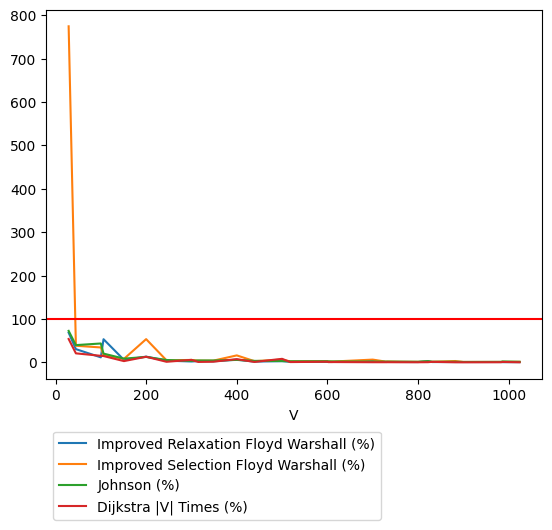

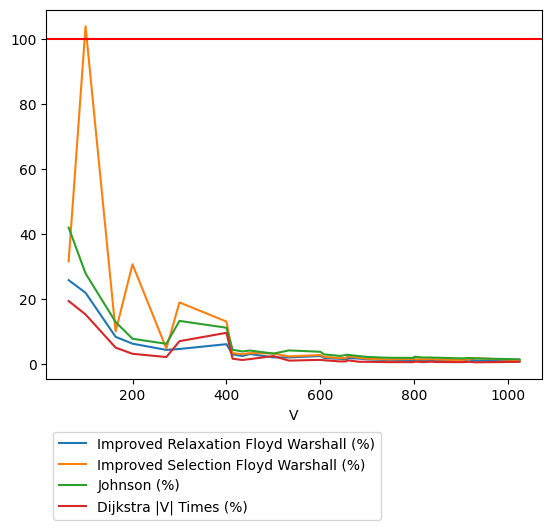

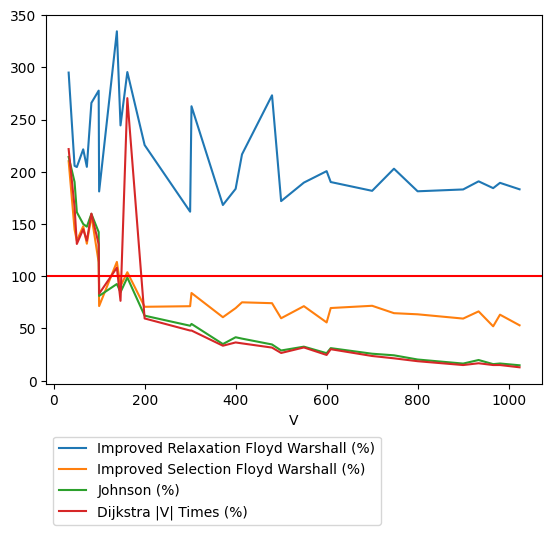

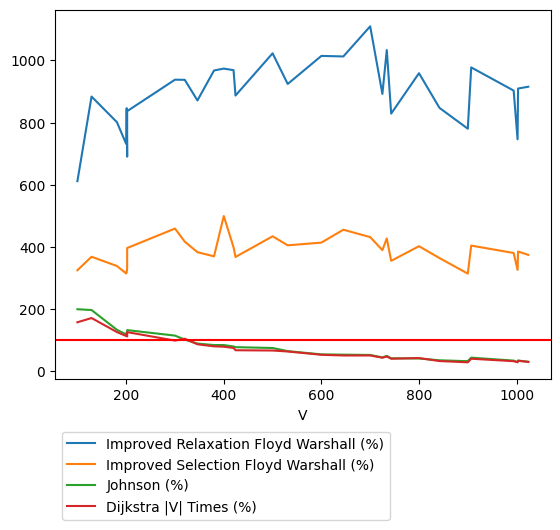

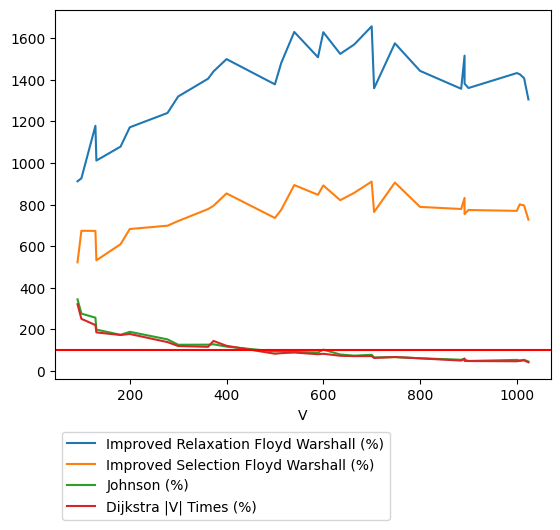

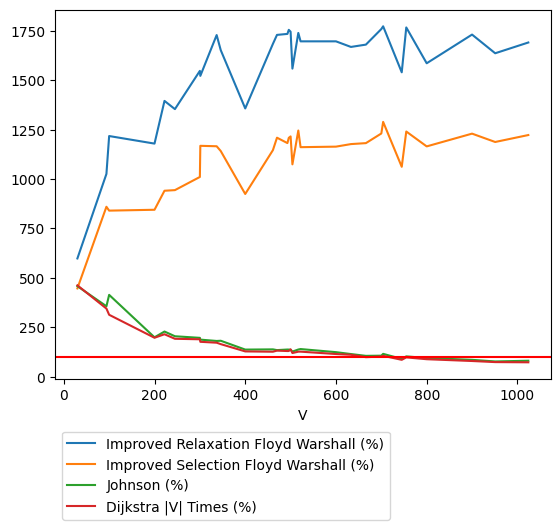

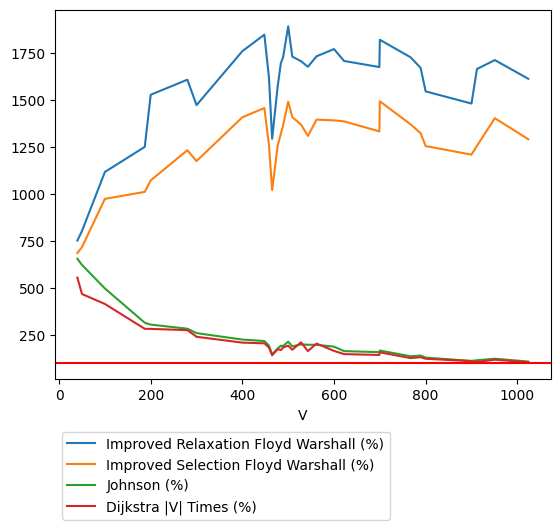

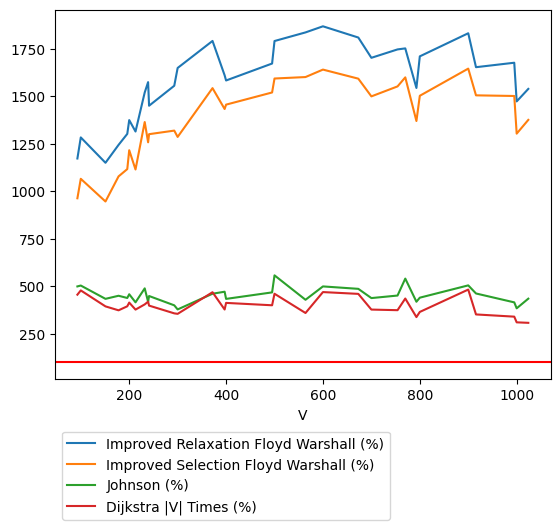

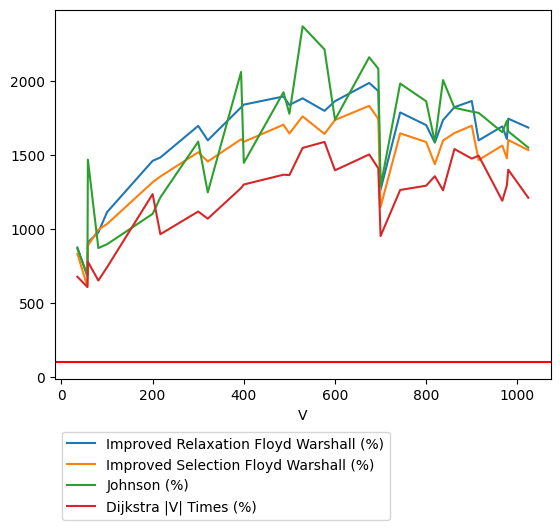

In [38]:
for key in df_times.keys():
    plot_for_range(key)

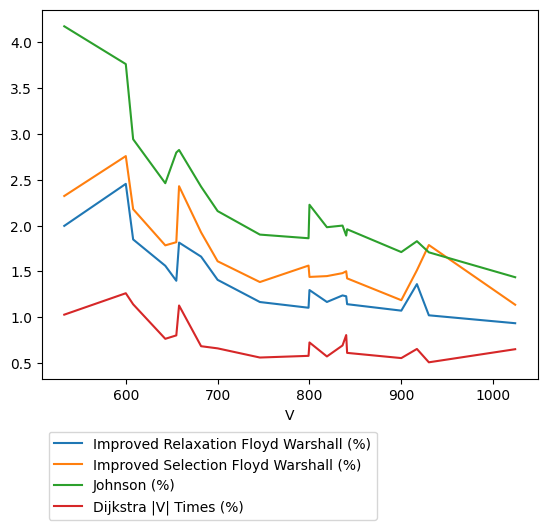

In [39]:
plot_for_range('V/2', False, 500)